In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from numpy import *
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.__correlation_coefficient = self.__correlacao()
        self.__inclination = self.__inclinacao()
        self.__intercept = self.__interceptacao()

    def __correlacao(self):
        covariacao = cov(self.x, self.y, bias=True)[0][1]
        variancia_x = var(self.x)
        variancia_y = var(self.y)
        return covariacao / sqrt(variancia_x * variancia_y)

    def __inclinacao(self):
        stdx = std(self.x)
        stdy = std(self.y)
        return self.__correlation_coefficient * (stdy / stdx)

    def __interceptacao(self):
        mediay = mean(self.y)
        mediax = mean(self.x)
        return mediay - self.__inclination * mediax

    def previsao(self, valor):
        return self.__intercept + (self.__inclination * valor)

    def plotar(self, x_previsto=None, y_previsto=None):
        x_reta = linspace(min(self.x), max(self.x), 100)
        y_reta = self.previsao(x_reta)

        plt.scatter(self.x, self.y, color='blue', label='Dados reais')
        plt.plot(x_reta, y_reta, color='red', label='Regressão linear')

        # Mostra o valor de cada ponto real
        for xi, yi in zip(self.x, self.y):
            plt.text(xi, yi + 50, f'{yi}', ha='center', fontsize=8, color='blue')
            plt.vlines(xi, 0, yi, linestyles='dashed', colors='gray', linewidth=0.5)

        # Exibir o ponto previsto (valor imputado)
        if x_previsto is not None and y_previsto is not None:
            plt.scatter(x_previsto, y_previsto, color='orange', marker='X', s=100, label='Valor previsto')
            plt.text(x_previsto, y_previsto + 50, f'{y_previsto:.1f}', ha='center', fontsize=9, color='orange')
            plt.vlines(x_previsto, 0, y_previsto, linestyles='dashed', colors='orange', linewidth=1)

        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Regressão Linear com Previsão')
        plt.legend()
        plt.grid(True)
        plt.show()

Previsão para 45.0: 2239.31


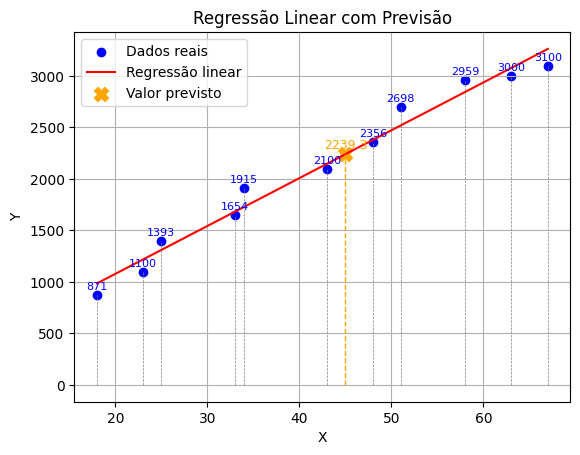

In [7]:
# Dados de exemplo
x = array([18, 23, 25, 33, 34, 43, 48, 51, 58, 63, 67])
y = array([871, 1100, 1393, 1654, 1915, 2100, 2356, 2698, 2959, 3000, 3100])

lr = LinearRegression(x, y)

valor = float(input('Digite o valor a ser verificado: '))
previsao = lr.previsao(valor)
print(f'Previsão para {valor}: {previsao:.2f}')

# Plotar gráfico
lr.plotar(x_previsto=valor, y_previsto=previsao)